# CNN & LSTM for Sentiment Analysis

The task is to classify the BBC news data based on their sentiment

In [66]:
# !gdown 19xU3kUyivRWGQzYXnpwlIjQqdfkD56v4

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
data = pd.read_csv('twitter_data.csv')

In [69]:
data

,id,user,sentiment,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


We have 4 types of sentiment: 'Negative', 'Positive', 'Neutral', and 'Irrelevant'.

<Axes: xlabel='sentiment'>

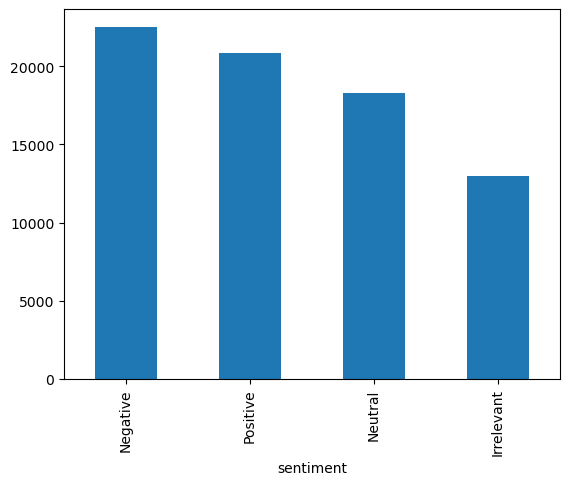

In [71]:
data['sentiment'].value_counts().plot.bar()

In [72]:
data.isnull().sum()

id             0
user           0
sentiment      0
tweet        686
dtype: int64

We will remove the tweets which are null since there's no way we can impute them.

In [74]:
data = data.dropna(axis=0)

Let's check the length in characters for each tweet
Add a new column for it

In [127]:
data['text_length'] = data['tweet'].apply(len)

C:\Users\admin\AppData\Local\Temp\ipykernel_15072\3303123027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data['tweet'].apply(len)


<Axes: ylabel='Frequency'>

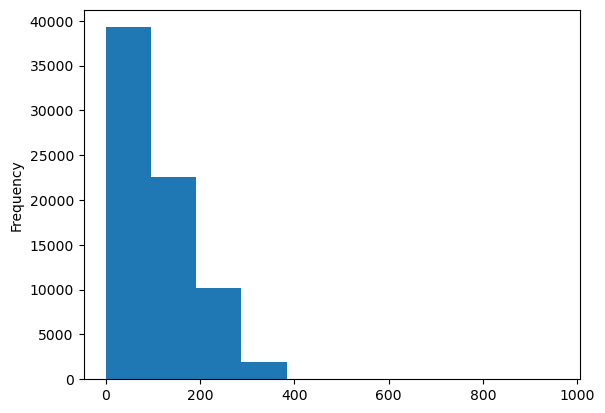

In [77]:
data['text_length'].plot.hist()

We have a small number of outliers

In [79]:
X = data['tweet']
Y = pd.get_dummies(data['sentiment'])

In [80]:
Y

,Irrelevant,Negative,Neutral,Positive
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
74677,False,False,False,True
74678,False,False,False,True
74679,False,False,False,True
74680,False,False,False,True


In [81]:
num_classes = len(Y.columns)
num_classes

4

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [172]:
texts = data['tweet']
matrix = []

for text in texts:
    words = text.split(" ")
    matrix.append(words)

In [83]:
data['num_words'] = data['tweet'].apply(lambda x: len(x.split(" ")))

C:\Users\admin\AppData\Local\Temp\ipykernel_15072\1723634801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_words'] = data['tweet'].apply(lambda x: len(x.split(" ")))


<Axes: ylabel='Frequency'>

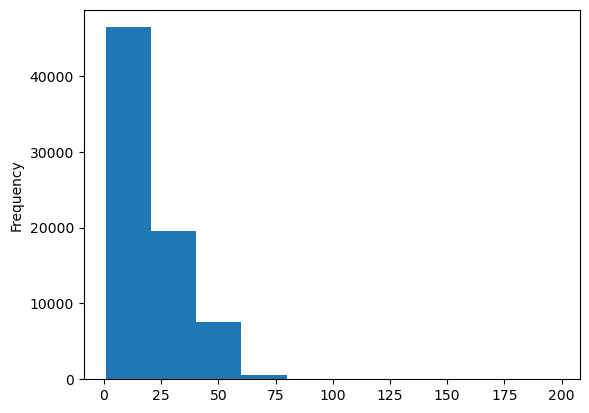

In [84]:
data['num_words'].plot.hist()

- The parameter num_words in the Tokenizer specifies the maximum number of unique tokens (words) to keep based on their frequency in the dataset. 

- Only the top 64 most frequent tokens will be considered, and all other tokens will be ignored.

- A small vocabulary (e.g., 64 words) might capture the majority of the important words used in tweets.

- According to the diagram the majority of the words are between 0 and 55-60. With a peak at 0-25.

- Most tweets have 0-25 words

- max_tokens will keep the most frequent words in thw vocabulary. the top 64 words. all others will be ignored.


In [85]:
max_tokens = 64

**Text Tokenization:** It splits a string of text into smaller parts (tokens). 

For example, splitting the sentence "I love programming" would result in tokens: ["I", "love", "programming"]

**fit_on_texts:** Builds the tokenizer's vocabulary from the training data.

**texts_to_sequences:** Converts both the training and test text data into sequences of integers based on the vocabulary built during training.

- For example, if the vocabulary contains {'I': 1, 'love': 2, 'programming': 3}, the sentence "I love programming" will be transformed into the sequence [1, 2, 3].



In [86]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

After the tokenizer processes the text data using texts_to_sequences,

X_train is transformed into a list of lists, where each list (referred to as **token_list**) contains integers.

These integers represent the tokens (words) from the corresponding text data in X_train.

In [157]:
X_train

array([[ 0,  0,  0, ..., 51, 51, 51],
       [ 0,  0,  0, ...,  0, 10,  7],
       [ 0,  0,  0, ..., 14, 55, 22],
       ...,
       [ 0,  0,  0, ...,  4, 10, 18],
       [ 0,  0,  0, ..., 52, 21,  3],
       [ 0,  0,  0, ...,  1, 29, 47]])

In [159]:
X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  9,  9, 51, 51, 51])

In [161]:
X_train[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  7])

In [87]:
len_tokens = [len(token_list) for token_list in X_train]

(array([2.5668e+04, 1.4859e+04, 8.4300e+03, 4.9220e+03, 2.8790e+03,
        1.8070e+03, 4.7000e+02, 1.2600e+02, 3.0000e+01, 5.0000e+00]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <BarContainer object of 10 artists>)

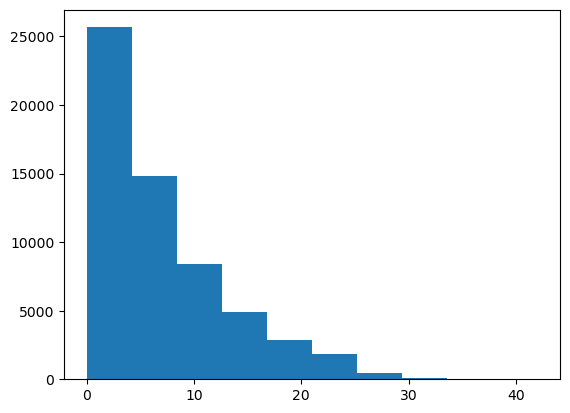

In [88]:
plt.hist(len_tokens)

In [89]:
maxlen=16
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

The code is padding the sequences of tokenized text data (X_train and X_test) to a fixed length of maxlen = 16. 

This means that each sequence in X_train and X_test will be padded or truncated to have exactly 16 tokens.

And any sequence shorter than maxlen will be padded with zeros (or another specified padding value) to make it exactly maxlen tokens long.

In [91]:
X_train.shape, X_test.shape

((59196, 16), (14800, 16))

# Create the Model

In [93]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
model = Sequential()
model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [95]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [96]:
history = model.fit(X_train, Y_train, validation_split=0.2, batch_size=64, epochs=10)

Epoch 1/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 1.3425 - precision: 0.4377 - recall: 0.0231 - val_loss: 1.2826 - val_precision: 0.6103 - val_recall: 0.0988
Epoch 2/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.2764 - precision: 0.5965 - recall: 0.1108 - val_loss: 1.2689 - val_precision: 0.6267 - val_recall: 0.1195
Epoch 3/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.2580 - precision: 0.6154 - recall: 0.1342 - val_loss: 1.2615 - val_precision: 0.6088 - val_recall: 0.1328
Epoch 4/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 1.2391 - precision: 0.6263 - recall: 0.1585 - val_loss: 1.2566 - val_precision: 0.5869 - val_recall: 0.1845
Epoch 5/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.2240 - precision: 0.6296 - recall: 0.1784 - val_loss: 1.2467 - val_precision: 0.5872 - val_recall: 0.2034
Epoch 6/10
740/740 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.2101 - precision: 0.6369 - recall: 0.1985 - val_loss: 1.2386 - val_precision: 0.6139 - val_

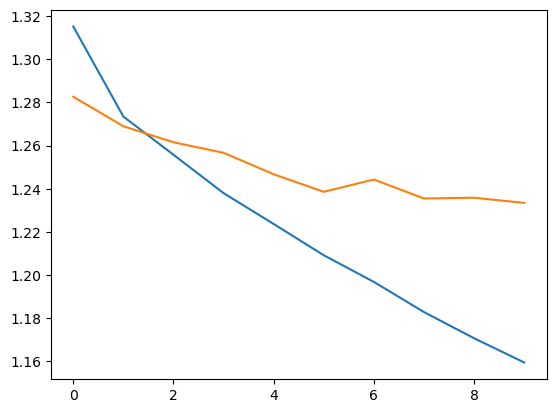

In [97]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

What does it mean?

In [99]:
preds = model.predict(X_test)

463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


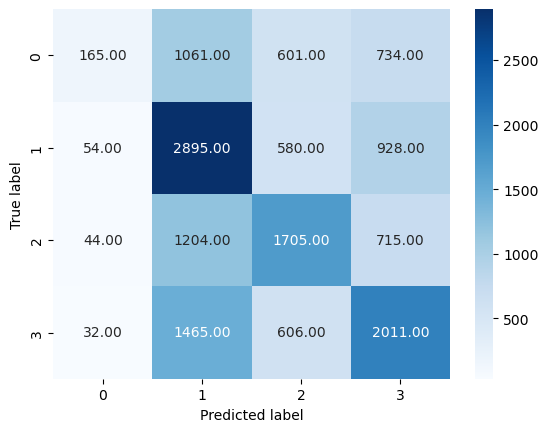

In [100]:
confmat = confusion_matrix(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1))
sns.heatmap(confmat, annot=True, cmap='Blues', fmt='5.2f')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [101]:
print(classification_report(np.argmax(Y_test.values, axis=1), np.argmax(preds, axis=1)))

              precision    recall  f1-score   support

           0       0.56      0.06      0.12      2561
           1       0.44      0.65      0.52      4457
           2       0.49      0.46      0.48      3668
           3       0.46      0.49      0.47      4114

    accuracy                           0.46     14800
   macro avg       0.49      0.42      0.40     14800
weighted avg       0.48      0.46      0.43     14800

